In [3]:
import pandas as pd


In [5]:
df=pd.read_csv('../input/emnist-balanced-train.csv')

In [6]:
df.columns

Index(['45', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.524', '0.525', '0.526', '0.527', '0.528', '0.529', '0.530', '0.531',
       '0.532', '0.533'],
      dtype='object', length=785)

In [7]:
df.shape

(112799, 785)

In [8]:
df.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
labels=df['45']

In [10]:
type(labels)

pandas.core.series.Series

In [11]:
len(labels.unique())

47

In [16]:
train_df=df.drop('45',axis=1)

In [17]:
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(train_df,labels,test_size=0.25)

In [20]:
y_train

4102       3
92229     25
105374    21
76453     18
63172     31
21344     35
19016      6
22056      5
79596     43
54346     12
10316      0
79994      8
47046      1
61332     34
57264      4
22197     18
16672     29
76239     13
17524     38
12695     22
89697      8
37717     24
35301      3
101063     3
39530     12
100338    13
105984    16
88766     31
37931     26
30757     33
          ..
45368     46
69689     38
53620     42
94136     10
37818     36
35211     19
17700      9
64116     36
38361     29
53670     39
24302      2
22521     10
31679     43
51141      3
61372     33
36205     12
69241     45
85021     20
36663     35
5943      42
10727     42
70995     16
107698     4
33065     39
67518      2
51835     25
21296     26
36959      8
71044      9
98290     13
Name: 45, Length: 84599, dtype: int64

In [21]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [22]:
y_train.shape






(84599,)

In [23]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [24]:
y_cat_train.shape

(84599, 47)

In [25]:
single_image=x_train.values[0,:].reshape([28, 28])

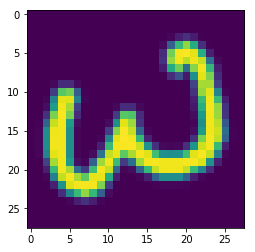

In [26]:
plt.imshow(single_image)

In [27]:
x_train=x_train.values.reshape(84599,28,28)
x_test=x_test.values.reshape(28200,28,28)

In [28]:
x_train=x_train/255
x_test=x_test/255

In [29]:
x_train = x_train.reshape(84599, 28, 28, 1)
x_test = x_test.reshape(28200,28,28,1)

In [30]:
x_train.shape

(84599, 28, 28, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf
import os

In [103]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))




model.add(Flatten())


model.add(Dense(256, activation='relu'))


model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))



model.add(Dense(47, activation='softmax'))



In [104]:

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'],)

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               409856    
_________________________________________________________________
dense_54 (Dense)             (None, 256)               65792     
__________

In [106]:
model.fit(x_train,y_cat_train,batch_size=128,epochs=10)

Epoch 1/10
84599/84599 [==============================] - 7s 87us/step - loss: 0.8440 - acc: 0.7343
Epoch 2/10
84599/84599 [==============================] - 6s 71us/step - loss: 0.4116 - acc: 0.8556
Epoch 3/10
84599/84599 [==============================] - 6s 71us/step - loss: 0.3410 - acc: 0.8762
Epoch 4/10
84599/84599 [==============================] - 6s 76us/step - loss: 0.2977 - acc: 0.8890
Epoch 5/10
84599/84599 [==============================] - 6s 71us/step - loss: 0.2660 - acc: 0.8987
Epoch 6/10
84599/84599 [==============================] - 6s 71us/step - loss: 0.2401 - acc: 0.9072
Epoch 7/10
84599/84599 [==============================] - 6s 74us/step - loss: 0.2199 - acc: 0.9129
Epoch 8/10
84599/84599 [==============================] - 7s 77us/step - loss: 0.2012 - acc: 0.9198
Epoch 9/10
84599/84599 [==============================] - 6s 73us/step - loss: 0.1867 - acc: 0.9249
Epoch 10/10
84599/84599 [==============================] - 6s 71us/step - loss: 0.1744 - acc: 0.9302

In [109]:
model.metrics_names

['loss', 'acc']

In [110]:
model.evaluate(x_test,y_cat_test)

28200/28200 [==============================] - 2s 71us/step


[0.4487725019772002, 0.8698936170212765]

In [111]:
from sklearn.metrics import classification_report

In [112]:
predictions = model.predict_classes(x_test)

In [113]:
y_cat_test.shape

(28200, 47)

In [114]:
predictions.shape

(28200,)

In [115]:
y_test.shape


(28200,)

In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       573
           1       0.58      0.60      0.59       621
           2       0.94      0.84      0.89       566
           3       0.99      0.98      0.98       592
           4       0.94      0.90      0.92       568
           5       0.91      0.90      0.91       575
           6       0.91      0.88      0.90       579
           7       0.98      0.98      0.98       589
           8       0.92      0.93      0.93       605
           9       0.68      0.85      0.76       629
          10       0.93      0.94      0.93       612
          11       0.96      0.98      0.97       590
          12       0.94      0.97      0.95       608
          13       0.94      0.92      0.93       615
          14       0.91      0.98      0.94       592
          15       0.61      0.67      0.64       579
          16       0.86      0.96      0.91       635
          17       0.92    

In [117]:

from keras.models import model_from_json

In [118]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


model.save_weights("model.h5")